In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler as scale
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression 

# I. Exploratory Data Analytics

In [3]:
df = pd.read_csv('C:/Users/TRUNG HOANG/Desktop/Github_projects/CreditCard/dataset.data',sep=',')
df.columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus']
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [4]:
#Checking the type of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    object 
 1   Age             689 non-null    object 
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  ApprovalStatus  689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


We have both continuous and nominal values for this dataset. In my opinion, Zipcode is only the index which can not count as the value so I decided to drop this column. 

In [5]:
df = df.drop(columns=["ZipCode"])
#Then check again
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'Income', 'ApprovalStatus'],
      dtype='object')

In [6]:
#Checking null value
for i in df.columns:
    print(df[i].value_counts())

b    467
a    210
?     12
Name: Gender, dtype: int64
?        12
22.67     9
20.42     7
25.00     6
19.17     6
         ..
28.33     1
18.75     1
18.50     1
40.25     1
36.42     1
Name: Age, Length: 349, dtype: int64
1.500     21
3.000     19
2.500     19
0.000     18
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: Debt, Length: 215, dtype: int64
u    518
y    163
?      6
l      2
Name: Married, dtype: int64
g     518
p     163
?       6
gg      2
Name: BankCustomer, dtype: int64
c     137
q      78
w      63
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: EducationLevel, dtype: int64
v     398
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64
0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
4.165     1
9.000     1
1.960     1
5.125     1
8.290     1
Name: YearsE

We can see fron the report above, the missing value is "?". 

So for the continous features, I will replace with the mean and with categorical features, the mode will be used to replace the missing values.

* First, we have to replace with NaN for Python understanding.

In [7]:
df = df.replace("?",np.nan)

* Then we will see again which columns has Nan values.

In [8]:
df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
Income             0
ApprovalStatus     0
dtype: int64

 ### Imputation missing value

In [9]:
# Check dtype again to replace NaN with imputation value 
df["Age"] = pd.to_numeric(df["Age"]) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          677 non-null    object 
 1   Age             677 non-null    float64
 2   Debt            689 non-null    float64
 3   Married         683 non-null    object 
 4   BankCustomer    683 non-null    object 
 5   EducationLevel  680 non-null    object 
 6   Ethnicity       680 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  Income          689 non-null    int64  
 14  ApprovalStatus  689 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 80.9+ KB


In [10]:
# Continous feature
df["Age"].fillna(df.Age.mean(),inplace=True)


In [11]:
df1 = df[["Gender","Married","BankCustomer","EducationLevel","Ethnicity"]]
df1.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity
0,a,u,g,q,h
1,a,u,g,q,h
2,b,u,g,w,v
3,b,u,g,w,v
4,b,u,g,m,v


In [12]:
# Categorical feature

imp = SimpleImputer(strategy="most_frequent")
df1 = imp.fit_transform(df1)
df1 = pd.DataFrame(df1,columns=["Gender","Married","BankCustomer","EducationLevel","Ethnicity"])
df1.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity
0,a,u,g,q,h
1,a,u,g,q,h
2,b,u,g,w,v
3,b,u,g,w,v
4,b,u,g,m,v


In [13]:
# Concatenate df and df1 and drop the duplicate columns
df = df.drop(columns=["Gender","Married","BankCustomer","EducationLevel","Ethnicity"])
table = pd.concat([df1,df],axis=1)
table.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ApprovalStatus
0,a,u,g,q,h,58.67,4.460,3.04,t,t,6,f,g,560,+
1,a,u,g,q,h,24.50,0.500,1.50,t,f,0,f,g,824,+
2,b,u,g,w,v,27.83,1.540,3.75,t,t,5,t,g,3,+
3,b,u,g,w,v,20.17,5.625,1.71,t,f,0,f,s,0,+
4,b,u,g,m,v,32.08,4.000,2.50,t,f,0,t,g,0,+


In [14]:
#Check missing value again:
table.isnull().sum()

Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
Age               0
Debt              0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
Income            0
ApprovalStatus    0
dtype: int64

After using imputation method, we do not have any missing values. 

### Checking imbalance class label

Text(0.5, 1.0, 'Class label Comparision')

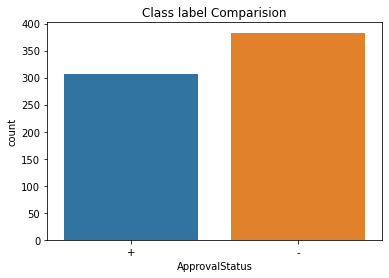

In [15]:
sns.countplot(x="ApprovalStatus",data=table)
plt.title('Class label Comparision')

As can be seen, the class label not has too much different so we can say that our dataset has balance class label. 

# II. Modelling

Because this dataset contain of both continuos and categorical features but the Decision Tree library in Python only understand numbers so that I have to convert categorical features into the ordinal(number with order) because I believe that, for credit card approval, there will be some priorities from your scores, your age,etc. 

In [16]:
# Make feature and label table
x = table.iloc[:,0:14]
y = table['ApprovalStatus']

In [17]:
from sklearn.preprocessing import OrdinalEncoder

X = x.copy()
cate_cols = ["Gender","Married","BankCustomer","EducationLevel","Ethnicity","PriorDefault","Employed","DriversLicense","Citizen"]
ordinal_encoder = OrdinalEncoder()
X[cate_cols] = ordinal_encoder.fit_transform(X[cate_cols])


In [18]:
# Check type of values again
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    float64
 1   Married         689 non-null    float64
 2   BankCustomer    689 non-null    float64
 3   EducationLevel  689 non-null    float64
 4   Ethnicity       689 non-null    float64
 5   Age             689 non-null    float64
 6   Debt            689 non-null    float64
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    float64
 9   Employed        689 non-null    float64
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    float64
 12  Citizen         689 non-null    float64
 13  Income          689 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 75.5 KB


In [19]:
# Split data into train/test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
# Checking dimension of spliting data
print(x_train.shape)
print(y_train.shape)

(461, 14)
(461,)


## a. Decision Tree

There are a lot of tuning parameters for Decision Tree algorithm, but I will put all of these parameters as default except **max_depth**. 

I will compare the accuracy score of each **max_depth** between train vs test set to avoid underfitting/overfitting. 

In [21]:
tr_acc = []
te_acc = []


for i in range(2,11):
    tree = DT(max_depth=i,random_state=0)
    tree.fit(x_train,y_train)
    #accuracy of train set
    tr_score = accuracy_score(tree.predict(x_train),y_train)
    #accuracy of test set
    te_score = accuracy_score(tree.predict(x_test),y_test)
    #append into list                      
    tr_acc.append(tr_score)
    te_acc.append(te_score)

In [22]:
depth = list(range(2, 11))
data = {'MaxDepth':depth,'TrainAccuracy':tr_acc,'TestAccuracy':te_acc}
compare = pd.DataFrame(data=data)
compare

,MaxDepth,TrainAccuracy,TestAccuracy
0,2,0.856833,0.850877
1,3,0.863341,0.837719
2,4,0.887202,0.846491
3,5,0.917570,0.842105
4,6,0.934924,0.842105
5,7,0.960954,0.820175
6,8,0.967462,0.833333
7,9,0.971800,0.833333
8,10,0.986985,0.815789


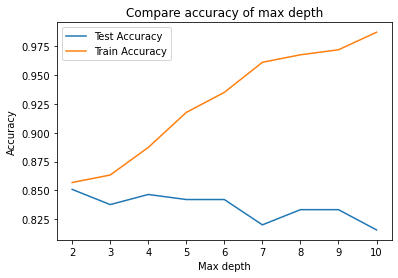

In [23]:
plt.plot(compare['MaxDepth'],compare['TestAccuracy'],label='Test Accuracy')
plt.plot(compare['MaxDepth'],compare['TrainAccuracy'],label='Train Accuracy')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title("Compare accuracy of max depth")

plt.legend()
plt.show()

As can be seen, at depth = 2 , we do not see the much different between train vs test accuracy. I think that, depth equal 2 is the best split for our dataset. 

In [24]:
# Save the accuracy to the report table
tr_table = []
te_table = []

tr_table.append(np.round(compare.iloc[0,1],3))
te_table.append(np.round(compare.iloc[0,2],3))

### Feature Importance


Beside the accuracy score, we can estimate the importance of the features to the class label.

In [25]:
importances = pd.DataFrame({'Feature':x_train.columns,'Importance':np.round(tree.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)
importances

,Feature,Importance
8,PriorDefault,0.536
5,Age,0.102
6,Debt,0.073
13,Income,0.066
9,Employed,0.054
3,EducationLevel,0.044
7,YearsEmployed,0.032
1,Married,0.021
10,CreditScore,0.018
11,DriversLicense,0.017


## b. K-nearest Neigbor

For KNN algorithm, I also use **default** parameters except for **n_neighbors**

For KNN, we have to standardize value because it will calculate the distance between the numeric values.

In [26]:
scaler = scale()
train_scale = scaler.fit_transform(x_train)
test_scale = scaler.transform(x_test)

In [27]:
knn_train = []
knn_test = []

neigh = list(range(3,13,2))
for i in neigh:
    knn = KNN(n_neighbors=i)
    knn.fit(train_scale,y_train)
    knn_tr_score = accuracy_score(knn.predict(train_scale),y_train)
    knn_te_score = accuracy_score(knn.predict(test_scale),y_test)
    knn_train.append(knn_tr_score)
    knn_test.append(knn_te_score)

In [28]:
knn_data = {'Neighbors':neigh,'TrainAccuracy':knn_train,'TestAccuracy':knn_test}
compare_k = pd.DataFrame(data=knn_data)
compare_k

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.900217,0.850877
1,5,0.887202,0.859649
2,7,0.874187,0.859649
3,9,0.856833,0.855263
4,11,0.861171,0.855263


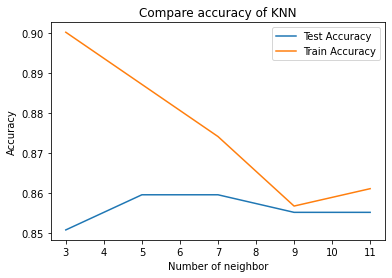

In [29]:
plt.plot(compare_k['Neighbors'],compare_k['TestAccuracy'],label='Test Accuracy')
plt.plot(compare_k['Neighbors'],compare_k['TrainAccuracy'],label='Train Accuracy')
plt.xlabel('Number of neighbor')
plt.ylabel('Accuracy')
plt.title("Compare accuracy of KNN")

plt.legend()
plt.show()

From the chart above, in my opinion, the best k is 5 because its has the highest testing accuracy and the training accuracy does not have the big difference.  

In [30]:
# Save to the report table
tr_table.append(np.round(compare_k.iloc[1,1],3))
te_table.append(np.round(compare_k.iloc[1,2],3))

## c. Logistic Regression

In [32]:
log = LogisticRegression()
log.fit(train_scale,y_train)

log_te_score = accuracy_score(log.predict(test_scale),y_test)
log_tr_score = accuracy_score(log.predict(train_scale),y_train)

print("The test accuracy of Logistic Regression is: %s" %(np.round(log_te_score,3)))
print("The train accuracy of Logistic Regression is: %s" %(np.round(log_tr_score,3)))

The test accuracy of Logistic Regression is: 0.855
The train accuracy of Logistic Regression is: 0.863


In [33]:
# Save to the report table
tr_table.append(np.round(log_tr_score,3))
te_table.append(np.round(log_te_score,3))

# III. Comparison table

In [34]:
list = ["Decision Tree","K Nearest Neighbor","LogisticRegresion"]
data = {"Algorithm": list, "Train_Accuracy":tr_table,"Test_Accuracy":te_table}
comp_table = pd.DataFrame(data=data)
comp_table

,Algorithm,Train_Accuracy,Test_Accuracy
0,Decision Tree,0.857,0.851
1,K Nearest Neighbor,0.887,0.860
2,LogisticRegresion,0.863,0.855


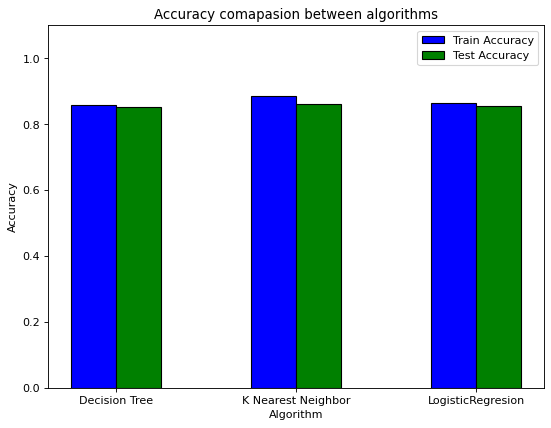

In [35]:
figure(figsize=(8, 6), dpi=80)

n=3
r = np.arange(n)
width = 0.25

plt.bar(r, tr_table, color = 'b',width = width, edgecolor = 'black',label='Train Accuracy')
plt.bar(r + width, te_table, color = 'g',width = width, edgecolor = 'black',label='Test Accuracy')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy comapasion between algorithms")
plt.ylim(0,1.1)

plt.xticks(r + width/2,list)

plt.legend()
plt.show()

# III. Conclusion

From the report table above, we can see that, the KNN algorithms has the highest accuracy but the others do not have the big difference with the best one. 

We can apply ensemble method such as Boosting, Bagging and Random Forest to increase the accuracy of this dataset. 